# seaborn可视化练习

In [16]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%config ZMQInteractiveShell.ast_node_interactivity='all'

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [36]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数
tmp = data.groupby(['year'])['passengers'].sum()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [9]:
tmp

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

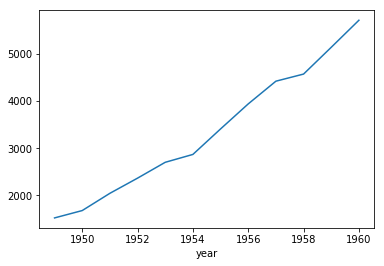

In [30]:
#使用pandas的plot功能
tmp.plot(kind = 'line')

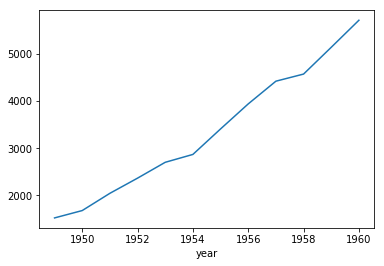

In [31]:
#pandas 自带 绘图功能 另一种不同的写法
tmp.plot.line()

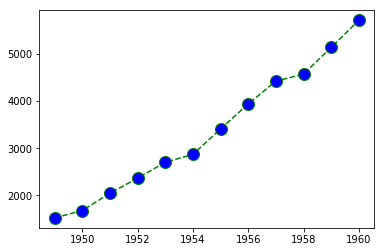

In [25]:
#使用 matlibplot 绘图
plt.plot(tmp.index, tmp.values,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)

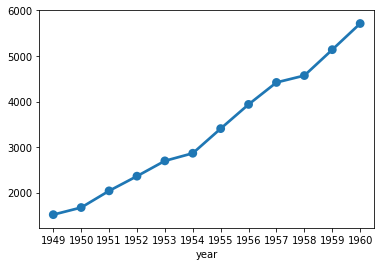

In [29]:
#使用seaborn 绘图 
sns.pointplot(x=tmp.index, y= tmp.values)

In [37]:
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

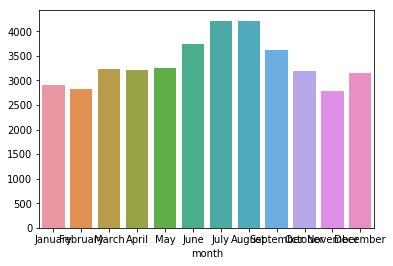

In [43]:
passengers_by_month = data.groupby('month')['passengers'].sum()
passengers_by_month
sns.barplot(x=passengers_by_month.index, y=passengers_by_month.values)

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [35]:
data2 = sns.load_dataset("iris")
data2.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


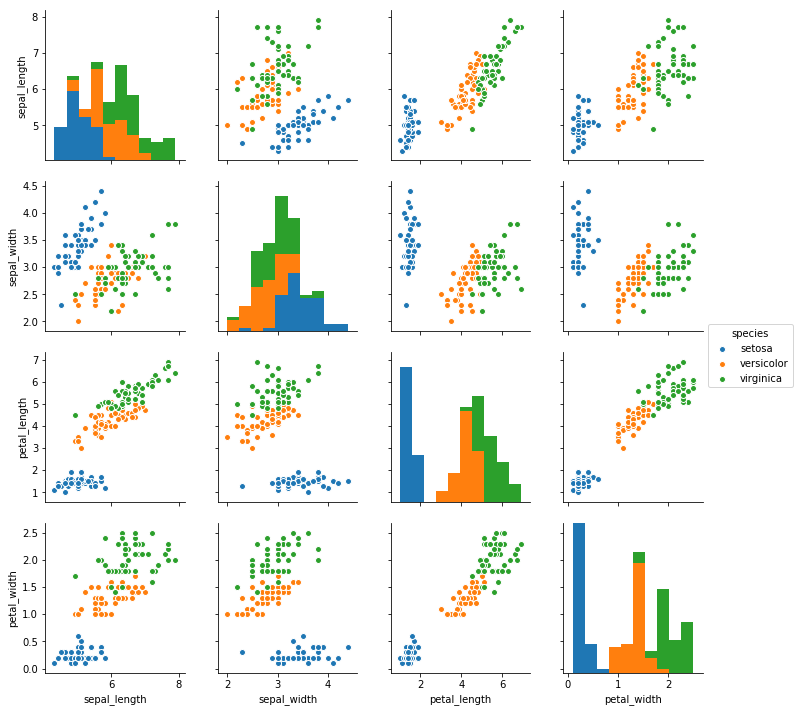

In [45]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
sns.pairplot(data2,hue='species')

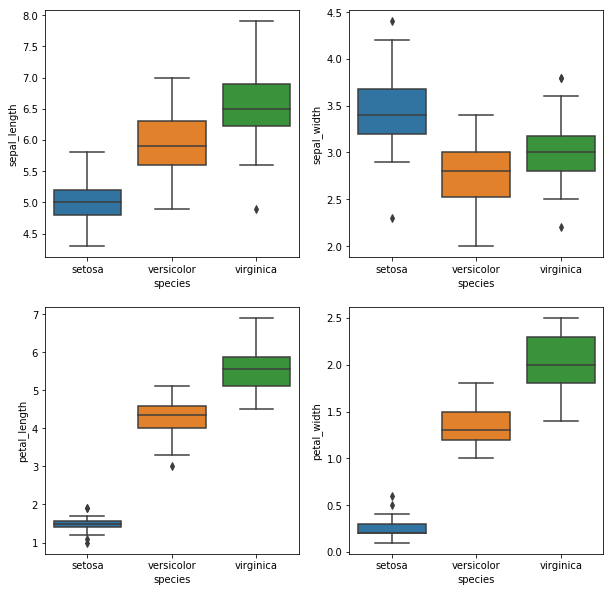

In [71]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
#分成四个图 的 箱式图
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x='species',y='sepal_length', data=data2,ax = ax[0,0])
sns.boxplot(x='species',y='sepal_width', data=data2,ax = ax[0,1])
sns.boxplot(x='species',y='petal_length', data=data2,ax = ax[1,0])
sns.boxplot(x='species',y='petal_width', data=data2,ax = ax[1,1])

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [74]:
data3 = sns.load_dataset("tips")
data3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


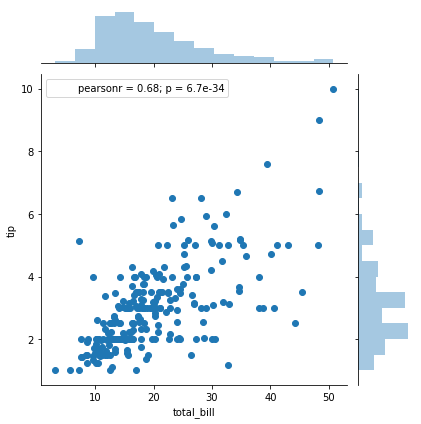

In [81]:
#小费和总消费之间的关系（散点图）
#with sns.axes_style("ticks"):
sns.jointplot(x="total_bill", y="tip", data=data3, kind='scatter')

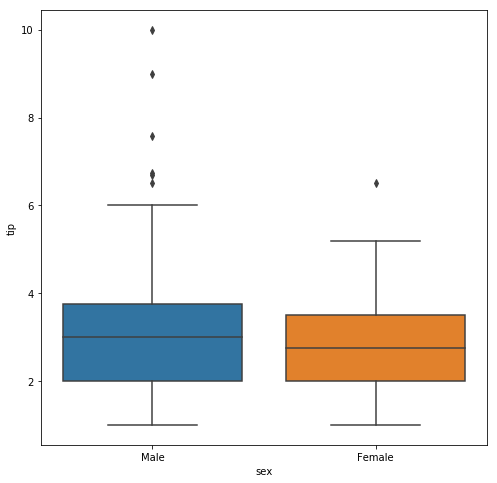

In [82]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sns.boxplot(x='sex', y='tip',data=data3)

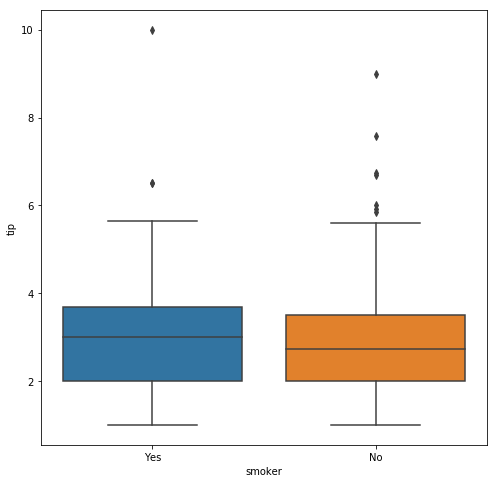

In [83]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
sns.boxplot(x='smoker',y='tip', data=data3)

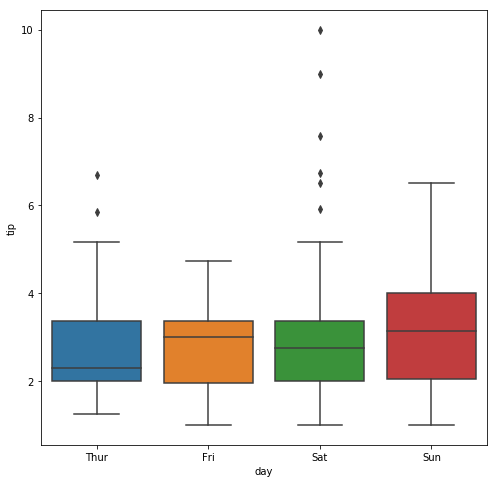

In [84]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
sns.boxplot(x='day',y='tip',data=data3)

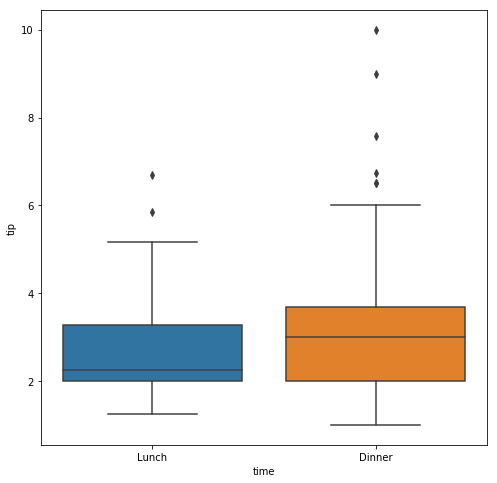

In [85]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
sns.boxplot(x='time',y='tip',data = data3)

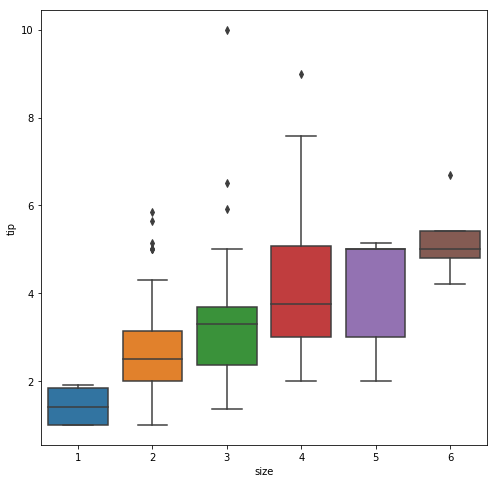

In [86]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x='size',y='tip',data=data3)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


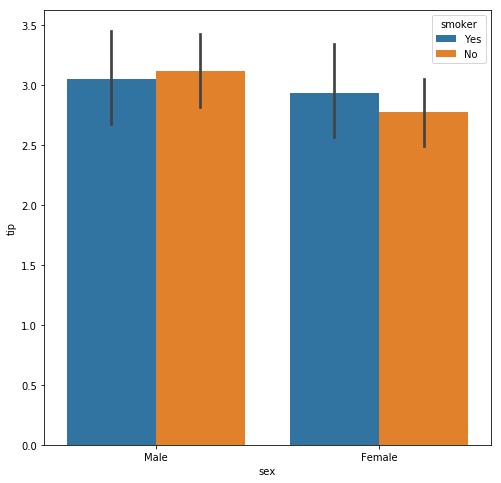

In [87]:
# 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.barplot(x='sex', y= 'tip', hue='smoker',data=data3)

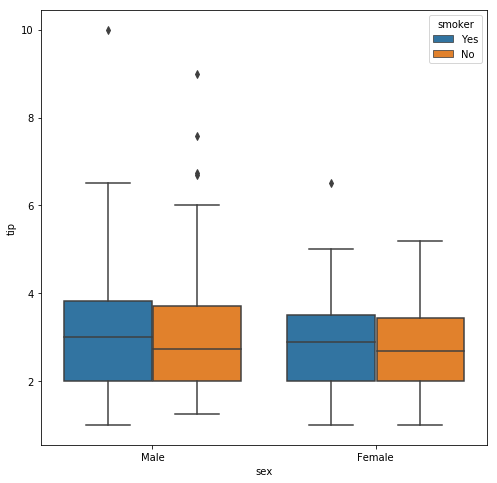

In [88]:
# 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.boxplot(x='sex', y= 'tip', hue='smoker',data=data3)

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [89]:
data4 = sns.load_dataset("titanic")
data4.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
import pandas as pd
mean_by_reg_co_day = data4[['pclass','survived']].groupby('pclass')['survived'].value_counts()
x= mean_by_reg_co_day.unstack()
x['total'] = x[0]+x[1]
x['total_']=1
x['die_prop'] = x[0]/x['total']
x['survived_prop'] = x[1]/x['total']
x.head()
type(x)

survived,0,1,total,total_,die_prop,survived_prop
pclass,,,,,,
1,80,136,216,1,0.370370,0.629630
2,97,87,184,1,0.527174,0.472826
3,372,119,491,1,0.757637,0.242363


pandas.core.frame.DataFrame

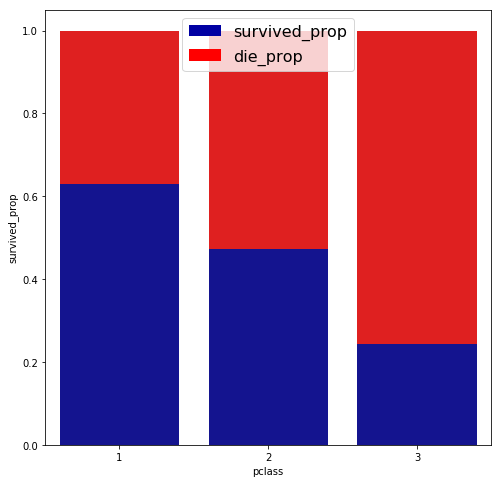

In [104]:
#不同性别的幸存比例（堆积柱状图）
sns.barplot(x=x.index,y='total_',data=x,color='red')
sns.barplot(x = x.index, y = x['survived_prop'], color = "#0000A3")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
plt.legend([bottombar, topbar], ['survived_prop', 'die_prop'], prop={'size':16})


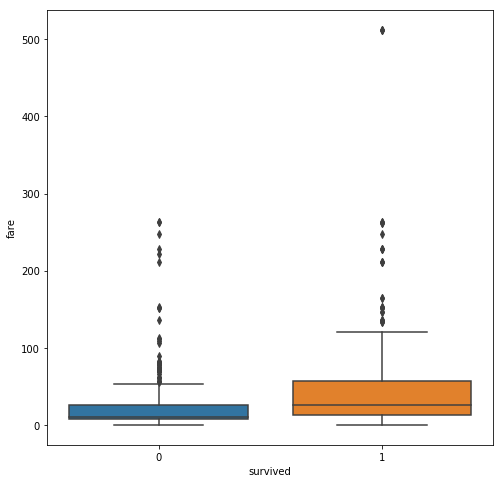

In [105]:
#幸存和遇难乘客的票价分布（分类箱式图）
sns.boxplot(x='survived', y ='fare', data = data4)

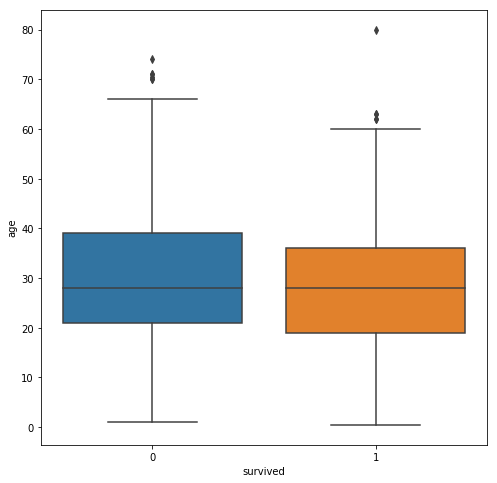

In [106]:
#幸存和遇难乘客的年龄分布（分类箱式图）
sns.boxplot(x='survived', y='age',data=data4)

pclass,1,2,3
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


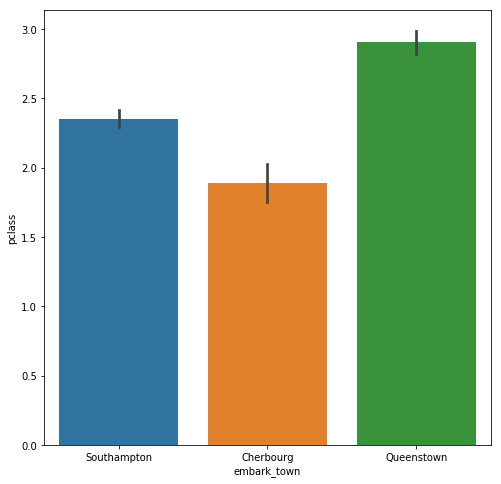

In [118]:
#不同上船港口的乘客仓位等级分布（分组柱状图）
x = data4.groupby('embark_town')['pclass'].value_counts()
x = x.unstack()
x.head()
sns.barplot(x='embark_town',y='pclass',data=data4)

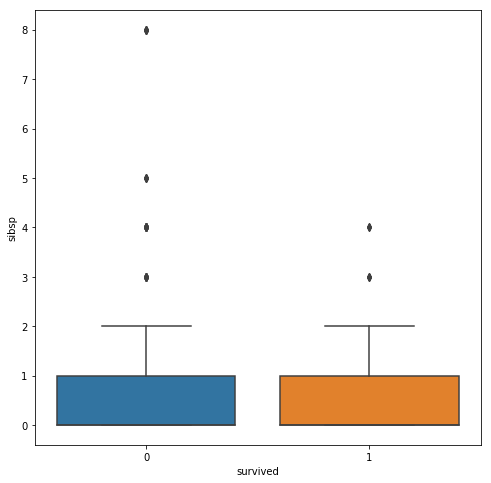

In [119]:
#幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
sns.boxplot(x='survived',y='sibsp',data=data4)

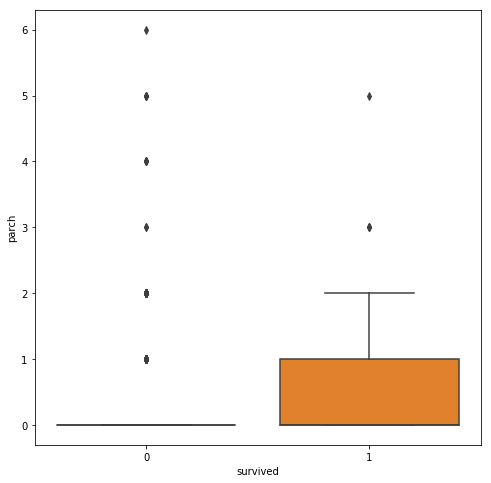

In [120]:
#幸存和遇难乘客父母子女的数量分布（分类箱式图）
sns.boxplot(x='survived',y='parch',data=data4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


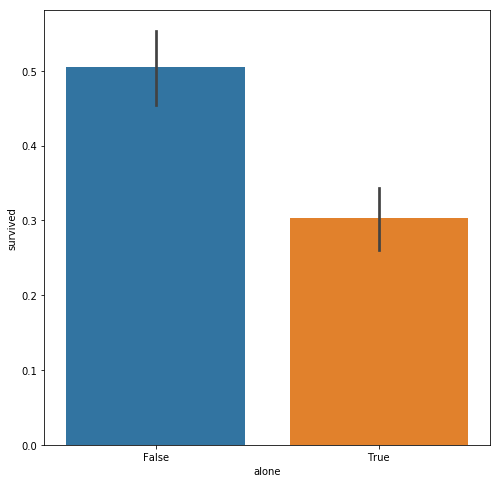

In [121]:
#单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
sns.barplot(x='alone',y='survived',data=data4)